In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def findA(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*A0 - a*B0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*A0 + a*B0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [3]:
def findB(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*B0 - b*A0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*B0 + b*A0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [4]:
def findBreakPoint(a, b, A0, B0):
    for i in list(float_range(0, 100, 0.01)):
        if findA(a, b, A0, B0, i) <= 0 or findB(a, b, A0, B0, i) <= 0:
            return i-0.00001
    return i

In [5]:
def float_range(start, stop, step):
    range = []
    while start < stop:
        range.append(start)
        start += step
    return range

In [6]:
def simulateBattle(a, b, A0, B0):
    breakPoint = findBreakPoint(a, b, A0, B0)
    t = np.array(list(float_range(0, breakPoint, 0.001)))
    A = findA(a, b, A0, B0, t)
    B = findB(a, b, A0, B0, t)
    
    plt.plot(t, A, label='Army A')
    plt.plot(t, B, label='Army B')

    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('# of soldiers')

    bottom, top = plt.ylim()
    plt.show()

    if (b*A0**2 > a*B0**2):
        print("The Winner is A!")
    elif (b*A0**2 < a*B0**2):
        print("The Winner is B!")
    else:
        print("Drawn!")

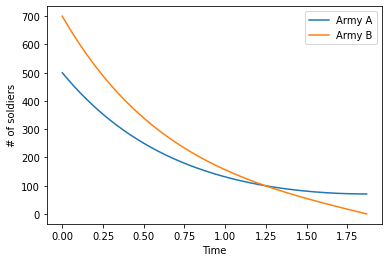

The Winner is A!


In [7]:
a = 1
b = 2
A0 = 500
B0 = 700
simulateBattle(a, b, A0, B0)

Sledeca funkcija ispituje ko pobedjuje u zavisnosti od ubojitosti - mi joj dajemo brojnost naste i protivnicke vojske, a ona nam vraca predvidjanje pobede u zavisnosti od mogucih koeficijenata ubojitosti

In [8]:
def findWinner(a, b, A0, B0):
    if (b*A0**2 > a*B0**2):
        return "A"
    elif (b*A0**2 < a*B0**2):
        return "B"
    else:
        return "D"

def simulateBattle2(A0, B0):
    N = 50
    r = np.array(list(range(N)))
    winners = np.zeros((N, N))
    
# za svaki x y nadjemo ko je pobedio
# onaj ko je pobedio -> koord idu u odg niz
# nasa ubojitos b
    for x in r:
        # protivnicka ubojitost a
        for y in r:
            if x==0 or y==0:
                continue
            w = findWinner(y, x, A0, B0)
            if (w == "A"):
                # winnerA[x] = y
                winners[y][x] = 1
                # winnerA[x].append(y)
            elif (w == "B"):
                # winnerB[x] = y
                winners[y][x] = -1
            # else:
                # drawn[x] = y
    
    newWinners = np.delete(winners, 0, 0)
    newWinners = np.delete(newWinners, 0, 1)

    plt.imshow(newWinners)
    plt.xlabel('Ubojitost vojske A')
    plt.ylabel('Ubojitost vojske B')

    plt.colorbar()
    plt.show()

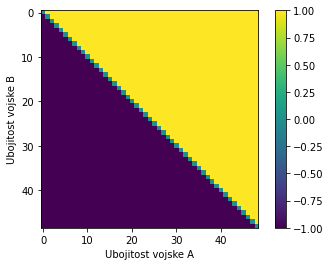

In [9]:
simulateBattle2(500, 500)

Ljubicasta oznacava pobedu protivnika (vojske B), zuta nasu pobedu (vojske A) a ova zelenkasta je nereseno

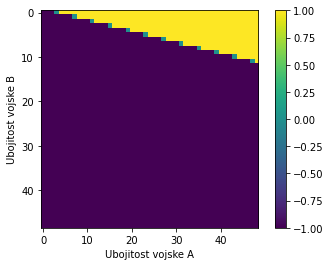

In [10]:
simulateBattle2(500, 1000)